# OASIS INFOBYTE INTERNSHIP
## DATA SCIENCE
## TASK 2 - UNEMPLOYMENT ANALYSIS
### -BY RAFE ANWAR PANJRI

In [1]:
#libraries used in code
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('Unemployment in India.csv')
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [5]:
df.describe

<bound method NDFrame.describe of              Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0    Andhra Pradesh   31-05-2019    Monthly                              3.65   
1    Andhra Pradesh   30-06-2019    Monthly                              3.05   
2    Andhra Pradesh   31-07-2019    Monthly                              3.75   
3    Andhra Pradesh   31-08-2019    Monthly                              3.32   
4    Andhra Pradesh   30-09-2019    Monthly                              5.17   
..              ...          ...        ...                               ...   
763             NaN          NaN        NaN                               NaN   
764             NaN          NaN        NaN                               NaN   
765             NaN          NaN        NaN                               NaN   
766             NaN          NaN        NaN                               NaN   
767             NaN          NaN        NaN                               N

## Preprocessing

In [6]:
df.isna().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [9]:
#as we can see we have 28 null rows as all colums have 28 null values ,so to go further first we have to remove
#or replace the null values for this we are going to do preprocessing

df1=df.isna().any(axis=1)
df1[df1].index

Int64Index([359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371,
            372, 754, 755, 756, 757, 758, 759, 760, 761, 762, 763, 764, 765,
            766, 767],
           dtype='int64')

In [10]:
df.iloc[359:768]

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
359,NaN,NaN,NaN,NaN,NaN,NaN,NaN
360,NaN,NaN,NaN,NaN,NaN,NaN,NaN
361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
362,NaN,NaN,NaN,NaN,NaN,NaN,NaN
363,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
#as we see that 28 rows are fully null and we can drop this rows

df=df.dropna()
df.isna().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Area                                        0
dtype: int64

In [13]:
df.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [20]:
#date column in standardized format

df['Date'] = pd.to_datetime(df[' Date'])

In [19]:
# for warning error 
import warnings
warnings.filterwarnings("ignore")

## EDA

In [21]:
df.describe()

#mean Unemployment Rate<labour Prediction Rate, employed rate is smallest
#standard deviation Unemployment>Labour Prediction Rate
#max Unemployment Rate>labour Prectiction Rate


,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


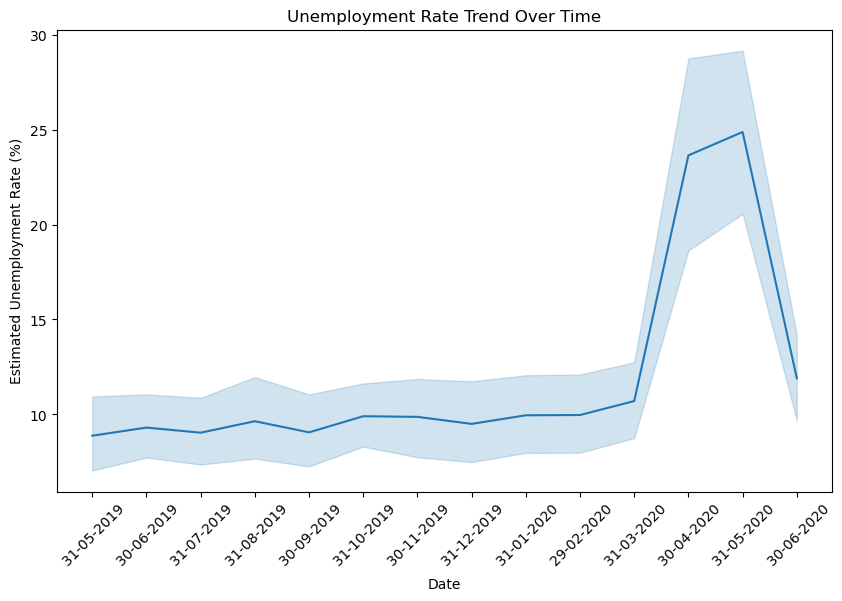

In [29]:
# Unemployment rate trend over time
plt.figure(figsize=(10, 6))
sns.lineplot(x=' Date', y=' Estimated Unemployment Rate (%)',data=df)
plt.title('Unemployment Rate Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.show()

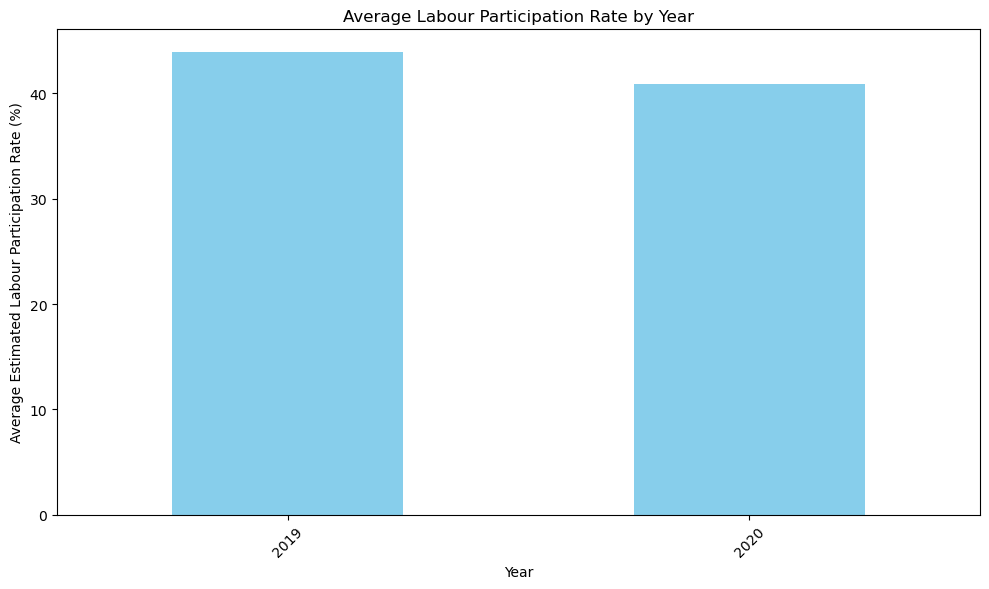

In [31]:
# labour particular rate trend over time

df['Year'] = df['Date'].dt.year

labourrate = df.groupby('Year')[' Estimated Labour Participation Rate (%)'].mean()

plt.figure(figsize=(10,6))
labourrate.plot(kind='bar',color='skyblue')
plt.title('Average Labour Participation Rate by Year')
plt.xlabel('Year')
plt.ylabel('Average Estimated Labour Participation Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#labour participation is greater in 2019 than 2020 , it shows that due to covide people couldn't participate in 2020 
#hence unemployed

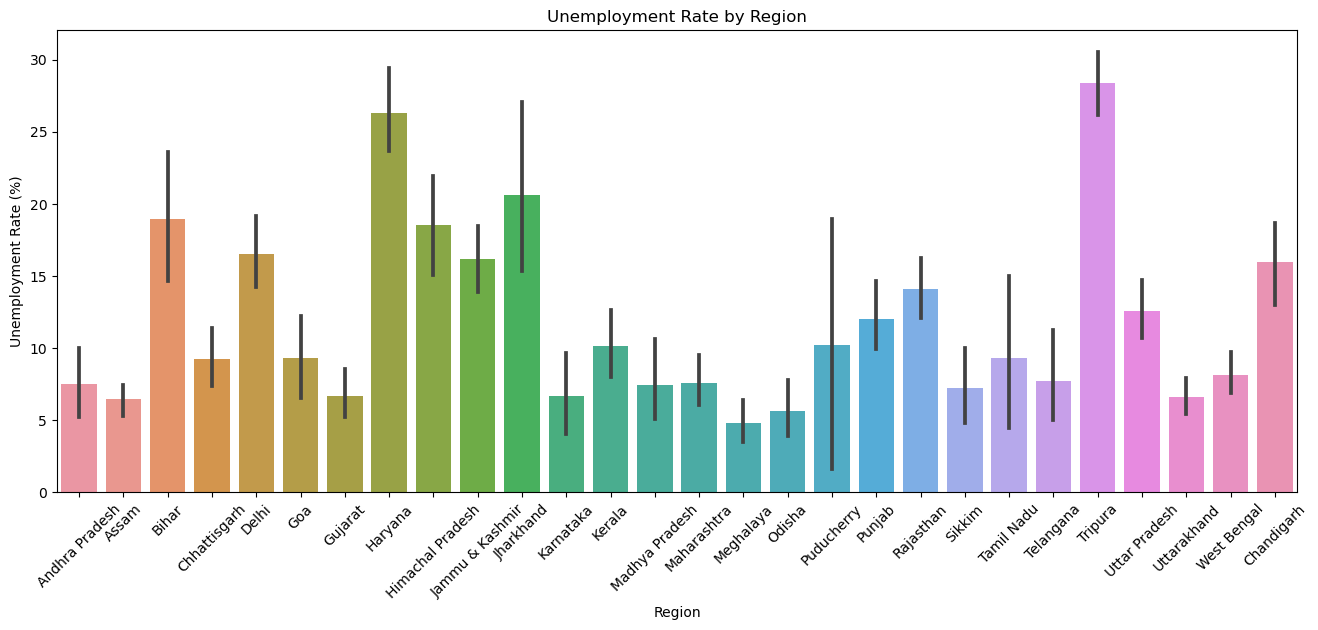

In [36]:
#analysis regionly

plt.figure(figsize=(16,6))
sns.barplot(x='Region', y=' Estimated Unemployment Rate (%)',data=df)
plt.title('Unemployment Rate by Region')
plt.xlabel('Region')
plt.ylabel('Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.show()

In [35]:
#frequency insights

df[' Frequency'].value_counts()


Monthly     381
 Monthly    359
Name:  Frequency, dtype: int64

In [37]:
#area analysis

df['Area'].value_counts()

Urban    381
Rural    359
Name: Area, dtype: int64

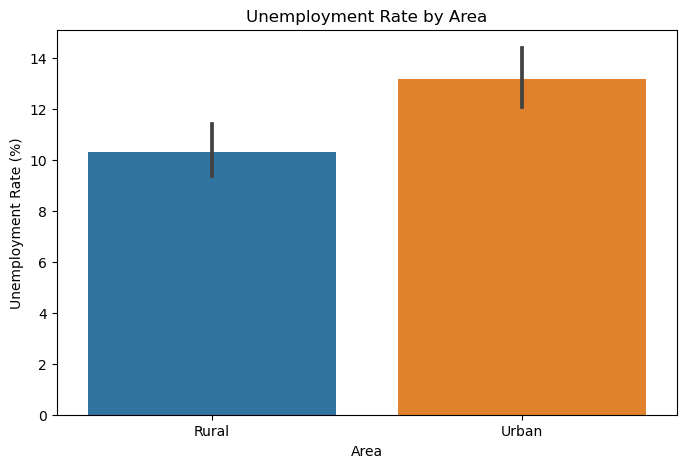

In [38]:

plt.figure(figsize=(8,5))
sns.barplot(x='Area', y=' Estimated Unemployment Rate (%)',data=df)
plt.title('Unemployment Rate by Area')
plt.xlabel('Area')
plt.ylabel('Unemployment Rate (%)')
plt.show()

# urban area have little great employment

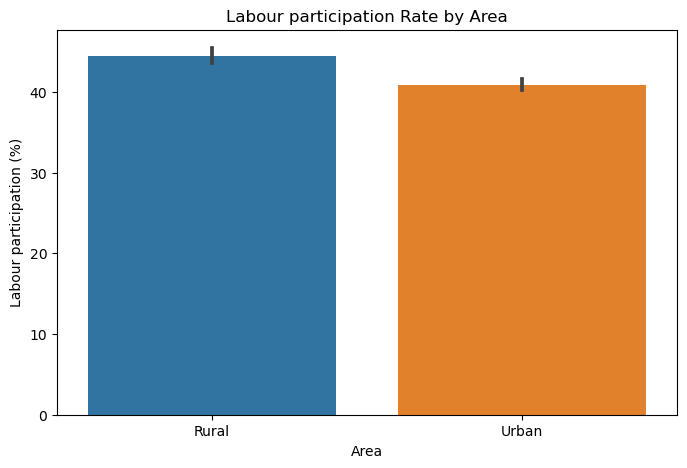

In [40]:
plt.figure(figsize=(8,5))
sns.barplot(x='Area', y=' Estimated Labour Participation Rate (%)',data=df)
plt.title('Labour participation Rate by Area')
plt.xlabel('Area')
plt.ylabel('Labour participation (%)')
plt.show()

#labour participation greater in rural areas

In [41]:
#data insights can also seen by correlation analysis

cor=df.corr()
cor

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Year
Estimated Unemployment Rate (%),1.000000,-0.222876,0.002558,0.262602
Estimated Employed,-0.222876,1.000000,0.011300,-0.031841
Estimated Labour Participation Rate (%),0.002558,0.011300,1.000000,-0.182460
Year,0.262602,-0.031841,-0.182460,1.000000


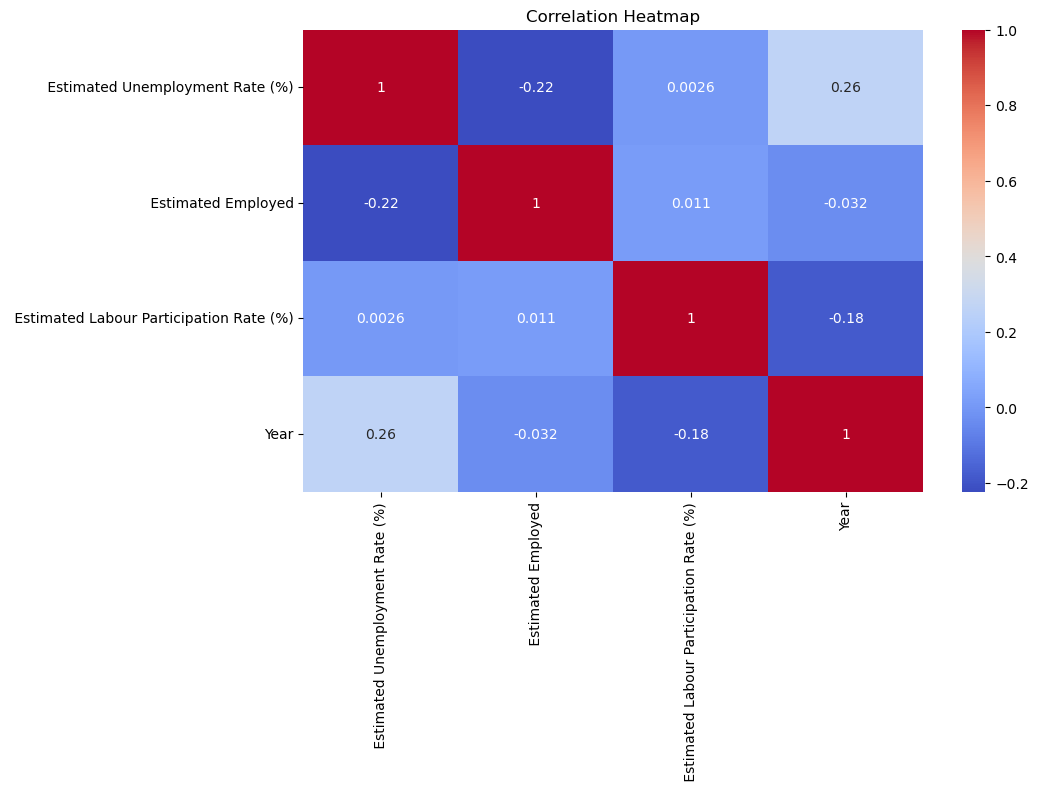

In [42]:
#displaying correlation result by heatmap

plt.figure(figsize=(10,6))
sns.heatmap(cor, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

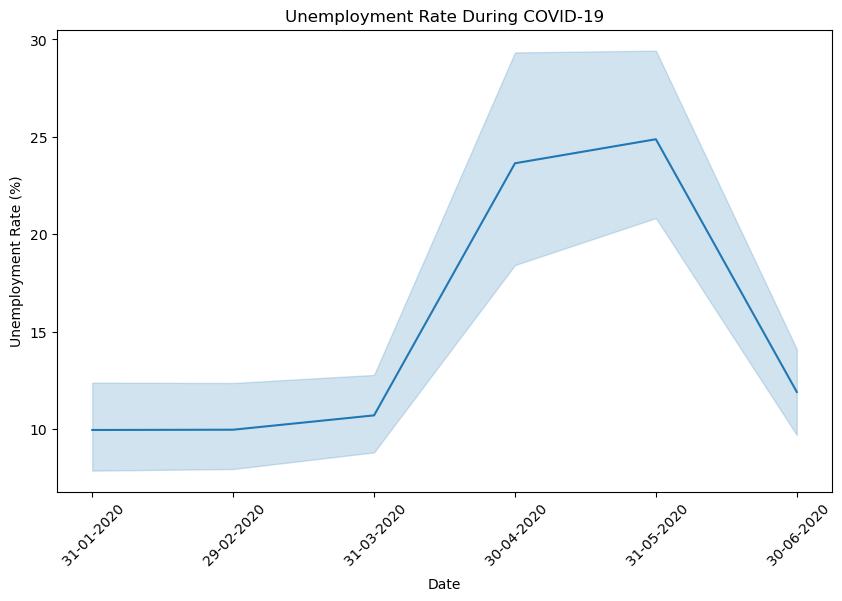

In [43]:
#analysis seeing covid-19 period

covid_start_date = pd.to_datetime('2019-12-31')
covid_end_date = pd.to_datetime('2020-08-29')

df2=df[(df['Date'] >covid_start_date)&(df['Date'] <=covid_end_date)]

plt.figure(figsize=(10, 6))
sns.lineplot(x=' Date', y=' Estimated Unemployment Rate (%)',data=df2)
plt.title('Unemployment Rate During COVID-19')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.show()

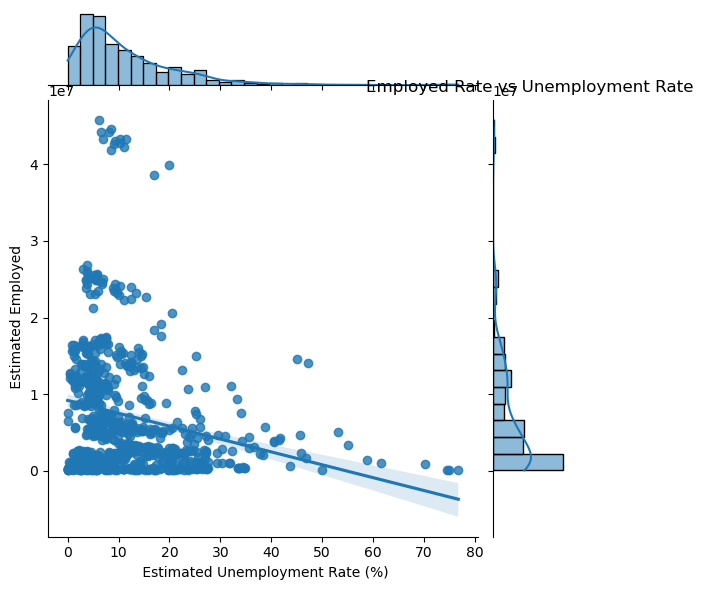

In [46]:

sns.jointplot(x=' Estimated Unemployment Rate (%)', y=' Estimated Employed',data=df, kind='reg')
plt.title('Employed Rate vs Unemployment Rate')
plt.show()

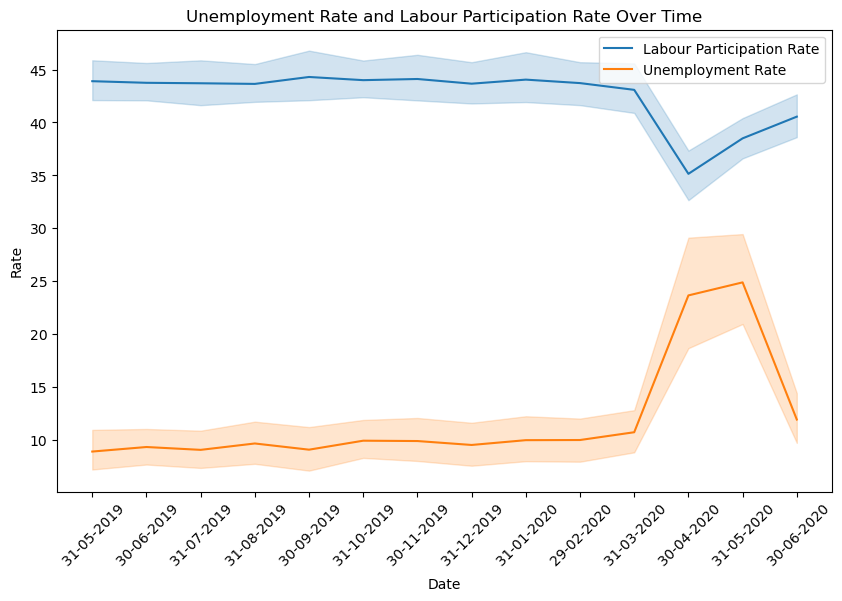

In [48]:
#comparing the unemployment and labour praticipation rate
plt.figure(figsize=(10, 6))
sns.lineplot(x=' Date', y=' Estimated Labour Participation Rate (%)',data=df, label='Labour Participation Rate')
sns.lineplot(x=' Date', y=' Estimated Unemployment Rate (%)',data=df, label='Unemployment Rate')
plt.title('Unemployment Rate and Labour Participation Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Rate')
plt.xticks(rotation=45)
plt.legend
plt.show()